<a id='Content'></a> 
### <b> Content </b>
1. [Initial setup](#Initial-setup)
2. [Distribution of categorical variables](#Distribution-of-categorical-variables)
3. [Distribution of continuous variables](#Distribution-of-continuous-variables)
4. [Correlation plot](#Correlation-plot)
5. [Missing values](#Missing-values)

### Initial setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import missingno as msno

print("Packages uploaded successfully!")

Packages uploaded successfully!


In [2]:
# Read dataset
data = pd.read_csv('../data/machine_readable.csv')

In [3]:
# Check first five rows
data.head(5)

,Chemical,CASRN,DNT,LogD,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,BDNF_Reduction,Activity_Syn,Syn_EC30,Syn_Viability_EC30,Activity_NNF,NNF_EC50min,NNF_EC50max,NNF_LDH_EC50,NNF_AB_EC50
0,1-2-Propyleneglycol,57-55-6,0,-1.02,1.0,0.421820,0.0,0.0,0.0,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN
1,5-Fluorouracil,51-21-8,1,-1.57,1.0,0.199528,0.0,0.0,0.0,1.0,1,NaN,91.8,1,0.46,5.03,3.37,2.28
2,Acetaminophen,103-90-2,0,0.40,1.0,0.613827,0.0,0.0,0.0,1.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN
3,Acetamiprid,135410-20-7,1,1.06,1.0,0.696776,0.0,0.0,0.0,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN
4,Acrylamide,79-06-1,1,-0.67,1.0,0.380063,0.0,0.0,0.0,1.0,0,NaN,NaN,1,8.26,11.30,NaN,NaN


In [4]:
# Check statistical summary
data.describe()

,DNT,LogD,BBB,Cbrain/Cblood,Pgp_inhibition,Pgp_substrate,Pgp_active,BDNF_Reduction,Activity_Syn,Syn_EC30,Syn_Viability_EC30,Activity_NNF,NNF_EC50min,NNF_EC50max,NNF_LDH_EC50,NNF_AB_EC50
count,88.000000,67.000000,76.000000,77.000000,79.000000,79.000000,79.000000,39.000000,88.000000,33.000000,31.000000,88.000000,64.000000,64.000000,35.000000,28.000000
mean,0.738636,1.438657,0.868421,2.082387,0.139241,0.050633,0.151899,0.487179,0.397727,12.339697,15.468387,0.727273,5.582500,44.711562,92.937429,8.515357
std,0.441896,3.308429,0.340279,3.789797,0.348409,0.220648,0.361216,0.506370,0.492233,14.530061,23.205336,0.447914,23.524081,247.687132,497.957469,10.570089
min,0.000000,-6.660000,0.000000,0.008951,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.000000,0.010000,0.030000,0.030000,0.030000
25%,0.000000,-0.710000,1.000000,0.333595,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,1.800000,0.000000,0.087500,4.117500,0.425000,0.605000
50%,1.000000,1.360000,1.000000,0.772097,0.000000,0.000000,0.000000,0.000000,0.000000,7.900000,6.400000,1.000000,0.480000,12.890000,4.140000,2.710000
75%,1.000000,3.845000,1.000000,1.611710,0.000000,0.000000,0.000000,1.000000,1.000000,11.800000,17.950000,1.000000,2.360000,23.595000,17.775000,13.450000
max,1.000000,7.910000,1.000000,23.155500,1.000000,1.000000,1.000000,1.000000,1.000000,51.900000,95.000000,1.000000,186.850000,1993.650000,2954.160000,29.680000


[Back](#Content)

### Distribution of categorical variables

In [5]:
replace_values_dnt = {0 : 'Negative/Safe', 1 : 'Positive'}
dnt = data.replace({"DNT": replace_values_dnt})

replace_values_bbb = {0 : 'Unpermeable', 1 : 'Permeable'}
bbb = data.replace({"BBB": replace_values_bbb})

replace_values_pgp_inh = {1 : 'Inhibitor', 0 : 'Non-inhibitor'}
pgp_inh = data.replace({"Pgp_inhibition": replace_values_pgp_inh})

replace_values_pgp_subs = {0 : 'Non-substrate', 1 : 'Substrate'}
pgp_subs = data.replace({"Pgp_substrate": replace_values_pgp_subs})

replace_values_pgp_act = {0 : 'Inactive', 1 : 'Active'}
pgp_act = data.replace({"Pgp_active": replace_values_pgp_act})

replace_values_bdnf = {0 : 'Negative', 1 : 'Positive'}
bdnf = data.replace({"BDNF, Reduction": replace_values_bdnf})

replace_values_syn = {0 : 'Inactive/Unknown', 1: 'Active'}
syn = data.replace({"Activity_Syn": replace_values_syn})

replace_values_nnf = {0 : 'Inactive/Unknown', 1 : 'Potent'}
nnf = data.replace({"Activity_NNF": replace_values_nnf})

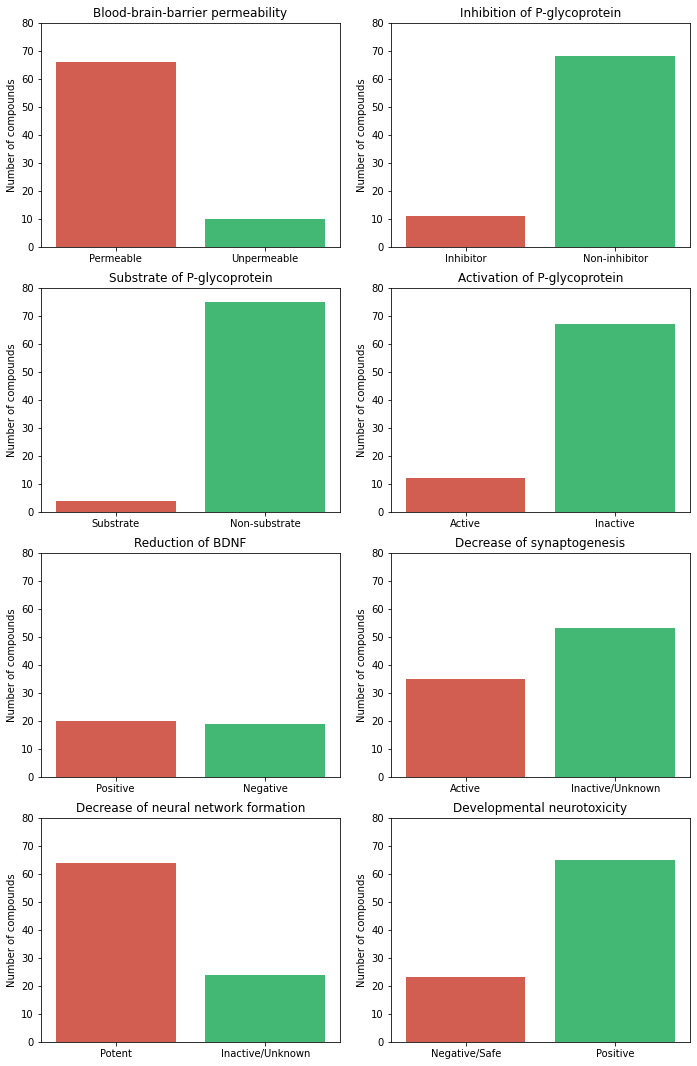

In [6]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
fig.tight_layout(pad=2)

my_palette = ["#e74c3c", "#2ecc71"]
sns.set_palette(sns.color_palette(my_palette))

sns.countplot(x="BBB", data=bbb, ax=ax[0,0])
ax[0,0].set(ylabel='Number of compounds', xlabel=None)
ax[0,0].set_title('Blood-brain-barrier permeability')
ax[0,0].set_ylim(0,80)

sns.countplot(x="Pgp_inhibition", data=pgp_inh, order = ["Inhibitor", "Non-inhibitor"], ax=ax[0,1])
ax[0,1].set(ylabel='Number of compounds', xlabel=None)
ax[0,1].set_title('Inhibition of P-glycoprotein')
ax[0,1].set_ylim(0,80)

sns.countplot(x="Pgp_substrate", data=pgp_subs, order = ["Substrate", "Non-substrate"], ax=ax[1,0])
ax[1,0].set(ylabel='Number of compounds', xlabel=None)
ax[1,0].set_title('Substrate of P-glycoprotein')
ax[1,0].set_ylim(0,80)

sns.countplot(x="Pgp_active", data=pgp_act, order = ["Active", "Inactive"], ax=ax[1,1])
ax[1,1].set(ylabel='Number of compounds', xlabel=None)
ax[1,1].set_title('Activation of P-glycoprotein')
ax[1,1].set_ylim(0,80)

sns.countplot(x="BDNF_Reduction", data=bdnf, ax=ax[2,0])
ax[2,0].set(ylabel='Number of compounds', xlabel=None)
ax[2,0].set_title('Reduction of BDNF')
ax[2,0].set_ylim(0,80)
ax[2,0].set_xticklabels(("Positive", "Negative"))


sns.countplot(x="Activity_Syn", data=syn, order=[ "Active", "Inactive/Unknown"],ax=ax[2,1])
ax[2,1].set(ylabel='Number of compounds', xlabel=None)
ax[2,1].set_title('Decrease of synaptogenesis')
ax[2,1].set_ylim(0,80)

sns.countplot(x="Activity_NNF", data=nnf, order = ["Potent", "Inactive/Unknown"], ax=ax[3,0])
ax[3,0].set(ylabel='Number of compounds', xlabel=None)
ax[3,0].set_title('Decrease of neural network formation')
ax[3,0].set_ylim(0,80)

sns.countplot(x="DNT", data=dnt, ax=ax[3,1])
ax[3,1].set(ylabel='Number of compounds', xlabel=None)
ax[3,1].set_title('Developmental neurotoxicity')
ax[3,1].set_ylim(0,80);


[Back](#Content)

### Distribution of continuous variables

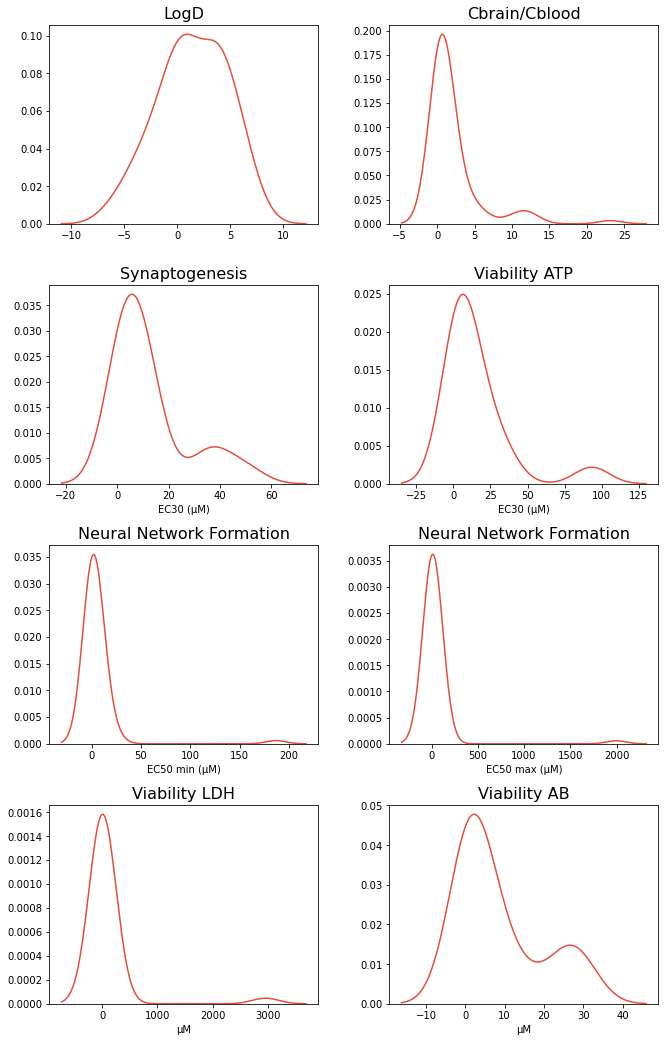

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15))
fig.tight_layout(pad=4)

sns.kdeplot(data['LogD'], legend = False, ax=ax[0,0])
ax[0,0].set(xlabel = None, ylabel = None)
ax[0,0].set_title('LogD', fontsize=16)

sns.kdeplot(data['Cbrain/Cblood'], legend=False, ax=ax[0,1])
ax[0,1].set(xlabel = None, ylabel = None)
ax[0,1].set_title('Cbrain/Cblood', fontsize=16)

sns.kdeplot(data['Syn_EC30'], legend=False, ax=ax[1,0])
ax[1,0].set(ylabel = None, xlabel = 'EC30 (μM)')
ax[1,0].set_title('Synaptogenesis', fontsize=16)

sns.kdeplot(data['Syn_Viability_EC30'], legend=False, ax=ax[1,1])
ax[1,1].set(ylabel = None, xlabel = 'EC30 (μM)')
ax[1,1].set_title('Viability ATP', fontsize=16)

sns.kdeplot(data['NNF_EC50min'], legend=False, ax=ax[2,0])
ax[2,0].set(ylabel = None, xlabel = 'EC50 min (μM)')
ax[2,0].set_title('Neural Network Formation', fontsize=16)

sns.kdeplot(data['NNF_EC50max'], legend=False, ax=ax[2,1])
ax[2,1].set(ylabel = None, xlabel = 'EC50 max (μM)')
ax[2,1].set_title('Neural Network Formation', fontsize=16)

sns.kdeplot(data['NNF_LDH_EC50'], legend=False, ax=ax[3,0])
ax[3,0].set(ylabel = None, xlabel = 'μM')
ax[3,0].set_title('Viability LDH', fontsize=16)

sns.kdeplot(data['NNF_AB_EC50'], legend=False, ax=ax[3,1])
ax[3,1].set(ylabel = None, xlabel = 'μM')
ax[3,1].set_title('Viability AB', fontsize=16);

[Back](#Content)

### Correlation plot

In [8]:
#Standardise continuous values
data_prep = data[['LogD', 'Cbrain/Cblood','Syn_EC30', 
                  'Syn_Viability_EC30', 'NNF_EC50min', 'NNF_EC50max', 'NNF_LDH_EC50', 'NNF_AB_EC50']]
sc = StandardScaler()
data_scaled = sc.fit_transform(data_prep)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = ['LogD', 'Cbrain/Cblood','Syn_EC30', 
                       'Syn_Viability_EC30', 'NNF_EC50min', 'NNF_EC50max', 
                       'NNF_LDH_EC50', 'NNF_AB_EC50']

#Add other discrete values and details
discrete = data [['Chemical', 'CASRN', 'DNT', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 
  'BDNF_Reduction', 'Activity_Syn', 'Activity_NNF']]
data_sc = discrete.join(data_scaled, lsuffix="_left", rsuffix="_right")
data_sc = data[['DNT', 'LogD', 'Cbrain/Cblood', 'BBB', 'Pgp_inhibition', 'Pgp_substrate', 'Pgp_active', 
             'BDNF_Reduction', 'Activity_Syn', 'Syn_EC30', 
             'Syn_Viability_EC30', 'Activity_NNF', 'NNF_EC50min', 'NNF_EC50max', 
             'NNF_LDH_EC50', 'NNF_AB_EC50']]

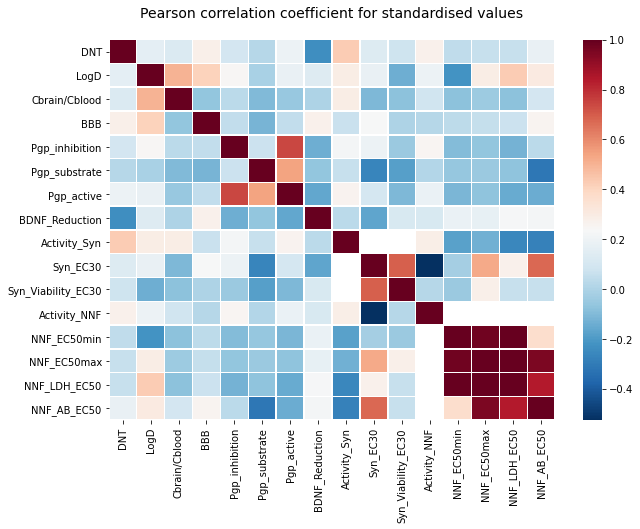

In [9]:
#Standardised
#This one used for manuscript
fig, ax = plt.subplots(figsize=(10,7))
pearsoncorr = data_sc.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title("Pearson correlation coefficient for standardised values\n", fontsize = 14);
#sns.set(font_scale=1)

[Back](#Content)

### Missing values

In [10]:
#Table with percentage
data_new = data.drop(columns=['Chemical', 'CASRN'])
missing = (data_new.isnull().sum(0)/97)*100
df = round(missing)
df

DNT                    0.0
LogD                  22.0
BBB                   12.0
Cbrain/Cblood         11.0
Pgp_inhibition         9.0
Pgp_substrate          9.0
Pgp_active             9.0
BDNF_Reduction        51.0
Activity_Syn           0.0
Syn_EC30              57.0
Syn_Viability_EC30    59.0
Activity_NNF           0.0
NNF_EC50min           25.0
NNF_EC50max           25.0
NNF_LDH_EC50          55.0
NNF_AB_EC50           62.0
dtype: float64

In [11]:
a = data.dropna(how='any')
print('Number of chemicals with complete information:', len(a))

Number of chemicals with complete information: 8


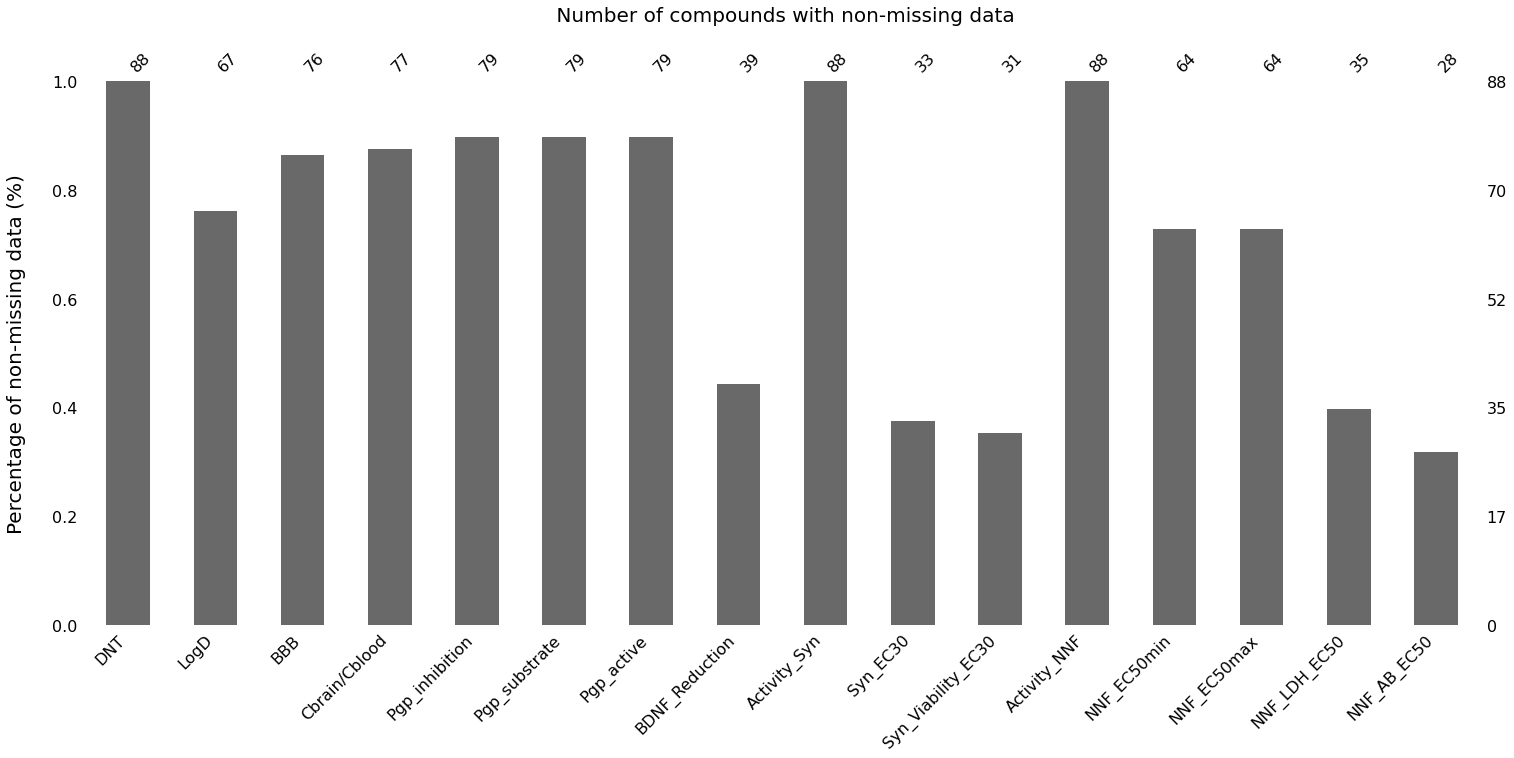

In [12]:
ax = msno.bar(data_new);
#ax.set(ylabel = 'Percentage non-missing data', xlabel = 'Variables');
ax.set_title(' Number of compounds with non-missing data\n', fontsize=20);
ax.set_ylabel('Percentage of non-missing data (%)\n', fontsize=20);

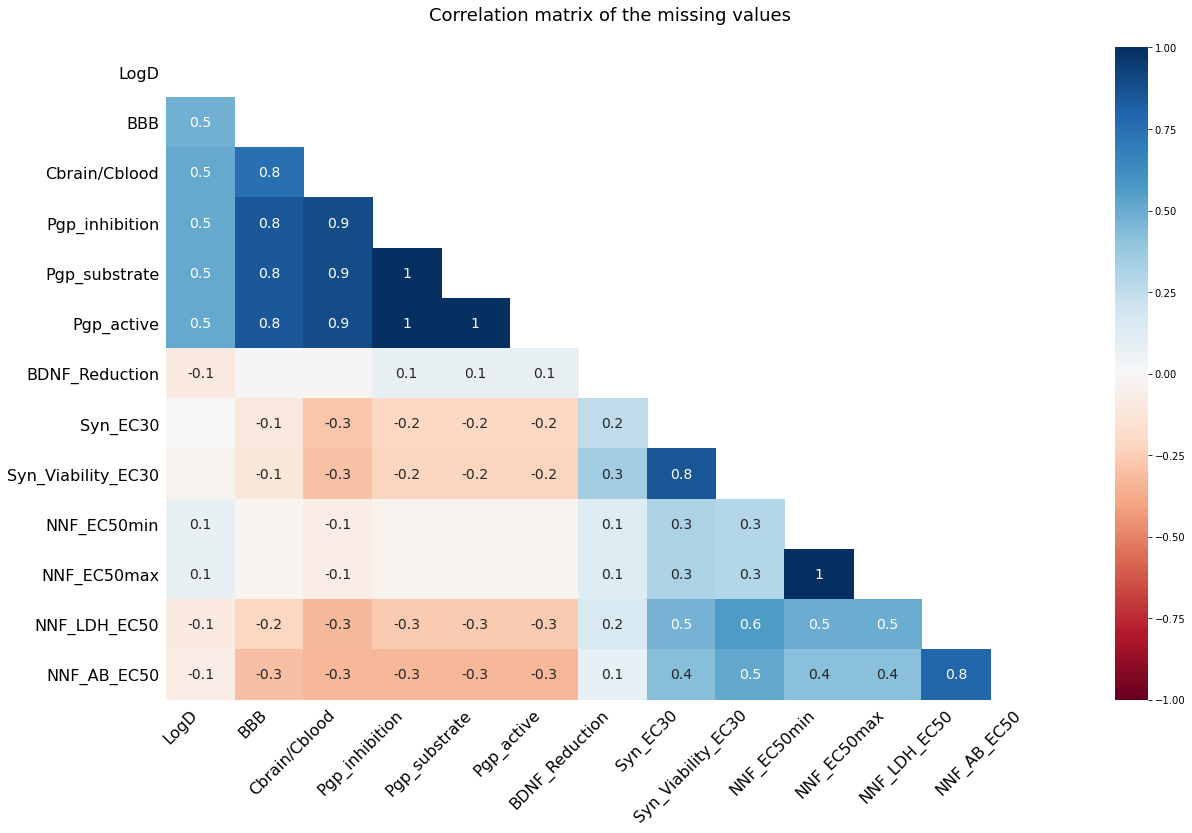

In [13]:
#Correlation heatmap 
#It measures nullity correlation
#How strongly the presence or absence of one variable affects the presence of another
msno.heatmap(data_new)
plt.title("Correlation matrix of the missing values \n", fontsize = 18);

[Back](#Content)

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Fri Sep 10 2021

Python implementation: CPython
Python version       : 3.8.10
IPython version      : 7.26.0

plotly    : 5.3.1
seaborn   : 0.11.0
missingno : 0.5.0
matplotlib: 3.3.1
numpy     : 1.21.2
pandas    : 1.3.2

Watermark: 2.2.0

